In [27]:
# Ejemplo algoritmo metropolis
def metropolis(func, steps=10000):
    """A very simple Metropolis implementation"""
    muestras = np.zeros(steps)
    old_x = func.mean()
    old_prob = func.pdf(old_x)
    
    for i in range(steps):
        new_x = old_x + np.random.normal(0, 0.5)
        new_prob = func.pdf(new_x)
        aceptacion = new_prob / old_prob
        if aceptacion >= np.random.random():
            muestras[i] = new_x
            old_x = new_x
            old_prob = new_prob
        else:
            muestras[i] = old_x
    
    return muestras

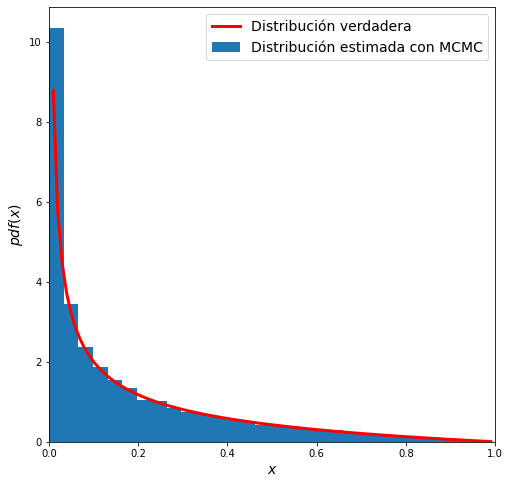

In [29]:
# distribución beta
from scipy import stats
func = stats.beta(0.4, 2)
samples = metropolis(func=func, steps=100000)
x = np.linspace(0.01, .99, 100)
y = func.pdf(x)
plt.figure(figsize=(8,8))
plt.xlim(0, 1)
plt.plot(x, y, 'r-', lw=3, label='Distribución verdadera')
plt.hist(samples, bins=30, density=True, label='Distribución estimada con MCMC')
plt.xlabel('$x$', fontsize=14)
plt.ylabel('$pdf(x)$', fontsize=14)
plt.legend(fontsize=14)
plt.show()

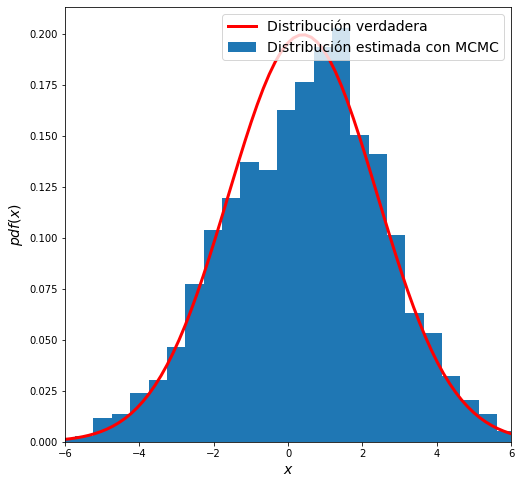

In [31]:
# distribución normal
func = stats.norm(0.4, 2)
samples = metropolis(func=func)
x = np.linspace(-6, 10, 100)
y = func.pdf(x)
plt.figure(figsize=(8,8))
plt.xlim(-6, 6)
plt.plot(x, y, 'r-', lw=3, label='Distribución verdadera')
plt.hist(samples, bins=30, density=True, label='Distribución estimada con MCMC')
plt.xlabel('$x$', fontsize=14)
plt.ylabel('$pdf(x)$', fontsize=14)
plt.legend(fontsize=14)
plt.show()

# ejemplo 2

In [ ]:
import numpy as np
import pandas as pd
import plotly.figure_factory as ff
import plotly.express as px
from ipywidgets import VBox, HBox, Output, Button, IntText, Label, FloatText

import matplotlib.pyplot as plt
from matplotlib.transforms import Affine2D
from matplotlib.collections import PathCollection
import matplotlib.animation as animation

In [ ]:
def targetdist(x):
        probX = np.exp(-x**2) * (2 + np.sin(x*5) + np.sin(x*2))
        return probX
x = np.arange(-3,3, 0.01)
y = targetdist(x)
px.line(x = x, y= y)

In [ ]:
def run_mcmc(caller):
    out.clear_output()
    display_label.value = 'Running MCMC'
        ### parameters ###
    burnin = burin_input.value  # number of burn-in iterations
    lag = lag_input.value  # iterations between successive samples
    nsamp = nsamp_input.value # number of samples to draw
    sig = sig_input.value # standard deviation of Gaussian proposal
    x = start_point_input.value # start point
    ### storage ###
    X = np.zeros((nsamp,1)) # samples drawn from the Markov chain
    acc = np.array((0, 0))  # vector to track the acceptance rate


    def MHstep(x0,sig):
        xp = np.random.normal(loc = x0, scale = sig)  # generate candidate from Gaussian
        accprob = targetdist(xp) / targetdist(x0) # acceptance probability
        u = np.random.rand() # uniform random number
        if u <= accprob: # if accepted
            x1 = xp # new point is the candidate
            a = 1 # note the acceptance
        else: # if rejected
            x1 = x0 # new point is the same as the old one
            a = 0 # note the rejection
        return x1, a

    def targetdist(x):
        probX = np.exp(-x**2) * (2 + np.sin(x*5) + np.sin(x*2))
        return probX


    # MH routine
    for i in range(burnin):
        x,a = MHstep(x,sig); # iterate chain one time step
        acc = acc + np.array((a, 1)) # track accept-reject status

    for i in range(nsamp):
        for j in range(lag):
            x,a = MHstep(x,sig) # iterate chain one time step
            acc = acc + np.array((a, 1)) # track accept-reject status
        X[i] = x # store the i-th sample
    df = pd.DataFrame(data=X, columns = ['Trace'])
    
    display_label.value = 'Average Acceptance: ' + str(round(acc[0] / acc[1],2))
    
    
    with out:
        fig, axs = plt.subplots(2, 1)

        axs[0].hist(df.values, bins=20)
        axs[1].plot(df)

        r = Affine2D().rotate_deg(90)

        fig = plt.gcf()
        fig.set_size_inches(8, 6)


        for x in axs[1].images + axs[1].lines + axs[1].collections:
            trans = x.get_transform()
            x.set_transform(r+trans)
            if isinstance(x, PathCollection):
                transoff = x.get_offset_transform()
                x._transOffset = r+transoff

        old = axs[1].axis()
        axs[1].axis(old[2:4] + old[0:2])

        plt.show()

In [ ]:
%matplotlib inline
run_button = Button(description = 'Run MCMC')
burin_input = IntText(value=0, description = 'Burn-in')
lag_input = IntText(value=1, description ='Lag')
nsamp_input = IntText(value=1000, description ='Num Samples')
sig_input = FloatText(value=1.0, description ='Sigma')
start_point_input = FloatText(value='-1', description ='Start Value')
display_label  = Label(value = 'Ready to go!')
    
out = Output()

run_button.on_click(run_mcmc)

all_widgets = HBox([VBox([HBox([run_button, display_label]) ,
                    burin_input,
                    lag_input,
                    nsamp_input,
                    sig_input,
                    start_point_input]),
                    out])

display(all_widgets)

In [ ]:
### parameters ###
burnin = 10  # number of burn-in iterations
lag = 1  # iterations between successive samples
nsamp = 1000 # number of samples to draw
sig = 1 # standard deviation of Gaussian proposal
x = -1 # start point
### storage ###
X = np.zeros((nsamp,1)) # samples drawn from the Markov chain
acc = np.array((0, 0))  # vector to track the acceptance rate


def MHstep(x0,sig):
    xp = np.random.normal(loc = x0, scale = sig)  # generate candidate from Gaussian
    accprob = targetdist(xp) / targetdist(x0) # acceptance probability
    u = np.random.rand() # uniform random number
    if u <= accprob: # if accepted
        x1 = xp # new point is the candidate
        a = 1 # note the acceptance
    else: # if rejected
        x1 = x0 # new point is the same as the old one
        a = 0 # note the rejection
    return x1, a

def targetdist(x):
    probX = np.exp(-x**2) * (2 + np.sin(x*5) + np.sin(x*2))
    return probX


# MH routine
for i in range(burnin):
    x,a = MHstep(x,sig); # iterate chain one time step
    acc = acc + np.array((a, 1)) # track accept-reject status

for i in range(nsamp):
    for j in range(lag):
        x,a = MHstep(x,sig) # iterate chain one time step
        acc = acc + np.array((a, 1)) # track accept-reject status
    X[i] = x # store the i-th sample

In [ ]:
acc[0] / acc[1]

0.5128712871287129

In [ ]:
df = pd.DataFrame(data=X, columns = ['Trace'])

In [ ]:
fig = ff.create_distplot([X.reshape(-1)], group_labels=['plot'], bin_size=0.1, show_rug=False)
fig.show()